In [1]:
#from statsmodels.tsa.arima_process import ArmaProcess 
#from statsmodels.tsa.stattools import pacf, acf
#from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import eye, asarray, dot, sum, diag
from scipy.linalg import svd
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests

import PCA_functions as pf
import Extreme_functions as ef


from statsmodels.tsa.stattools import adfuller
from Data import Data
from datetime import datetime

from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.cluster import AgglomerativeClustering, DBSCAN

import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation

import scipy.stats as st

import reverse_geocoder as rg

from pandas_datareader import wb

plt.rcParams["figure.figsize"] = (20,10)

In [2]:
def neighbour_average(pre_list,result,lon,lat):
    shift = [[-0.25,0,0.25],[-0.25,0,0.25]]
    shift_list = []
    for element in itertools.product(*shift):
        shift_list.append(element)
    shift_list.remove((0,0))
    r = []
    for x,y in shift_list:
        if (lon + x,lat + y) in pre_list:
            j = pre_list.index((lon + x,lat + y))
            r.append(result.iloc[:,j].values)
        #else:
         #   print("NO")
          #  print(lon + x,lat + y)
           # r.append(np.zeros(817))   
    r = np.array(r)        
    return(np.average(r, axis=0))

In [3]:
level = 12
temporal_limits = {"time_min":datetime(1948, 1, 1, 0, 0),"time_max":datetime(2016, 1, 1, 0, 0) } 
spatial_limits = {"lon_min":320,"lon_max":60,"lat_min":-40,"lat_max":40}

# Correlation between extremes and occurrences

In [7]:
kalahari = ['NA', 'BW','ZA','ZM','ZW','AO','MZ','LS']
horn = ['ET','SO','KE','TZ','MG','UG','DJ']
equator = ['CD','CG','CM','GA','CF','TG','GH', 'CI']
sahara_south = ['SD','TD','NE','NG','ML','MR','SN','GN','BJ','BF','SL','LR']
sahara_north = ['DZ','MA','TN']
middle_east = ['LY','EG','IL','IQ','IR','JO','LB','SY','SA','AE','YE','OM','QA','KW']

countries_1 = ['NA', 'BW','ZA','ZM','ZW','AO','MZ','LS']
countries_3 = ['ET','SO','KE','TZ','MG','UG','DJ']
countries_5 = ['CD','CG','CM','GA','CF','TG','GH', 'CI']
countries_2 = ['SD','TD','NE','NG','ML','MR','SN','GN','BJ','BF','SL','LR']
countries_4 = ['DZ','MA','TN']
countries_0 = ['LY','EG','IL','IQ','IR','JO','LB','SY','SA','AE','YE','OM','QA','KW']

In [5]:
rolling_n = 12
extreme_type = 'dry'
cluster = 1

In [ ]:
code_convertor = {"kalahari":1,"horn":3, "equator":5, "sahara_south":2, "sahara_north":4, "middle_east":0}

In [19]:
def IID_plot_occurrences(region,region_name, extreme_type = "dry"): 
    code_convertor = {"kalahari":1,"horn":3, "equator":5, "sahara_south":2, "sahara_north":4, "middle_east":0}
    cluster = code_convertor[region_name]
    
    if extreme_type == "dry":
        file_name = "Data_{}.csv".format(cluster)
    else:
        file_name = "flood_{}.csv".format(cluster)
    et = pd.read_csv(file_name)
    et  = et.iloc[:,[0,1]]
    et  = et.dropna()
    et["year"] = pd.to_numeric(et["year"])
    
    df_oni = ef.extreme_plot(cluster,12, extreme_type = extreme_type)
    df_oni = df_oni.iloc[1:,:]
    N = df_oni.shape[0]
    df_oni = df_oni.rolling(12).sum()
    Idx = np.arange(11,N,12)
    df_oni = df_oni.iloc[Idx,:]

    year = np.arange(1977,2016)
    df_oni["year"] = year

    df = df_oni.merge(et, how = 'left')
    df = df.fillna(0)
    df = df.drop(["oni"], axis=1)

    df = df.set_index("year")
    df_norm = (df - df.mean())/df.std()

    title = "Correlation between number of events and nodes hit by {} extreme - {}".format(extreme_type,region_name)
    plot = df_norm.plot(figsize=(20,10), title = title, fontsize = 22).legend(fontsize = 18)
    #plot = df_norm.plot(figsize=(20,10), title = title, fontsize = 22).legend(fontsize = 18)
    fig = plot.get_figure()
    filename = "../plots/IDD/{}/region_{}_occurrence.png".format(extreme_type,region_name)
    correlation = df_norm.corr(method = 'spearman')
    corr_text = "Correlation is {:.3f}".format(correlation.iloc[0,1])
    fig.text(0.1,0.9,corr_text,fontsize=18)
    fig.savefig(filename)
    return(df)

    #df_norm.plot()

    #df.corr()

In [23]:
regions_countries = [kalahari,horn,equator,sahara_south, sahara_north, middle_east]

In [24]:
regions = ["kalahari","horn","equator","sahara_south", "sahara_north", "middle_east"]

/home/mathsys2/Files/Time_Series/Climate_Network/Causality/TimeSeries/notebooks/Extreme_functions.py:322: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  RFThree = r.rolling(rolling_n).apply(sum)
/home/mathsys2/Files/Time_Series/Climate_Network/Causality/TimeSeries/notebooks/Extreme_functions.py:322: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  RFThree = r.rolling(rolling_n).apply(sum)
/home/mathsys2/Files/Time_Series/Climate_Network/Causality/TimeSeries/notebooks/Extreme_functions.py:322: FutureWarning: Currently, 'apply' passes the values as n

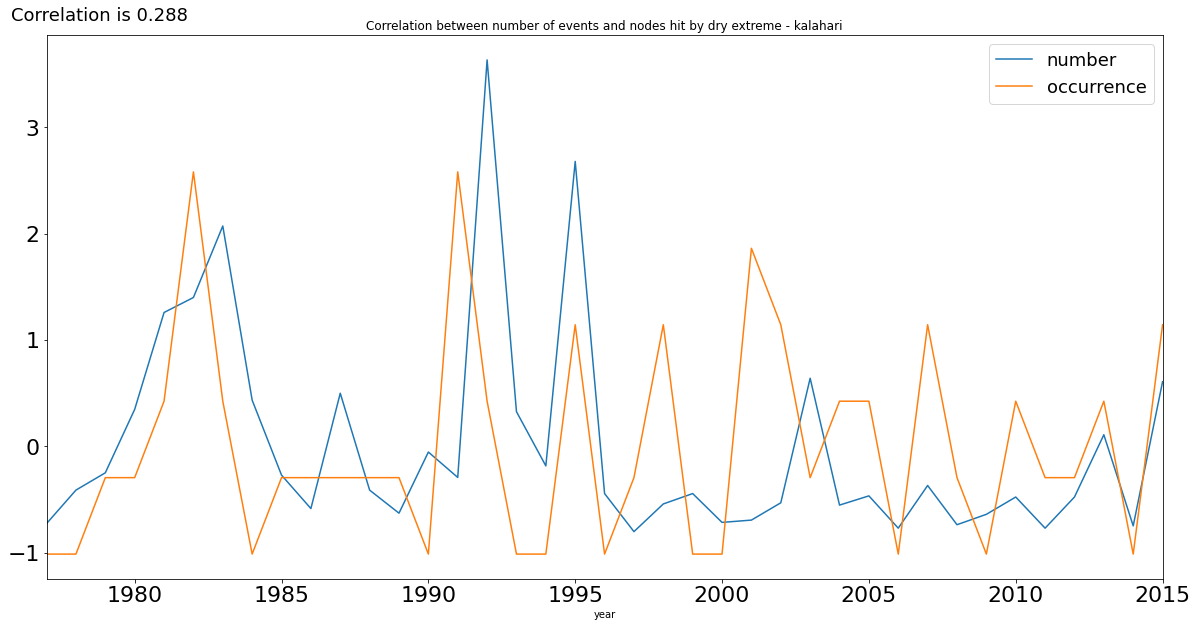

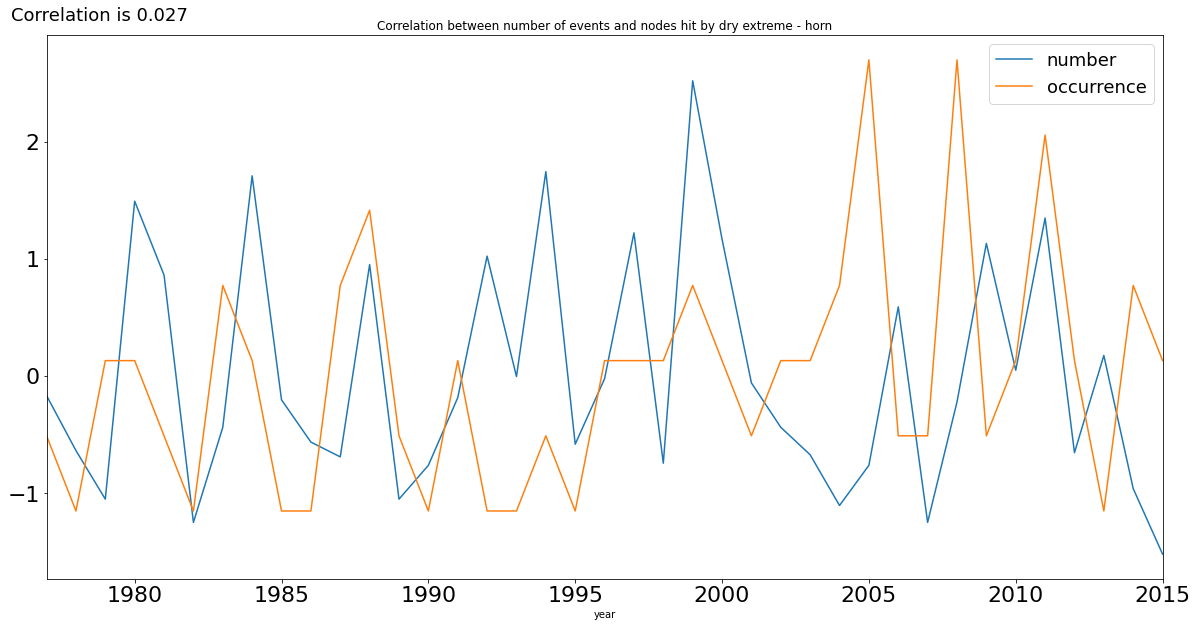

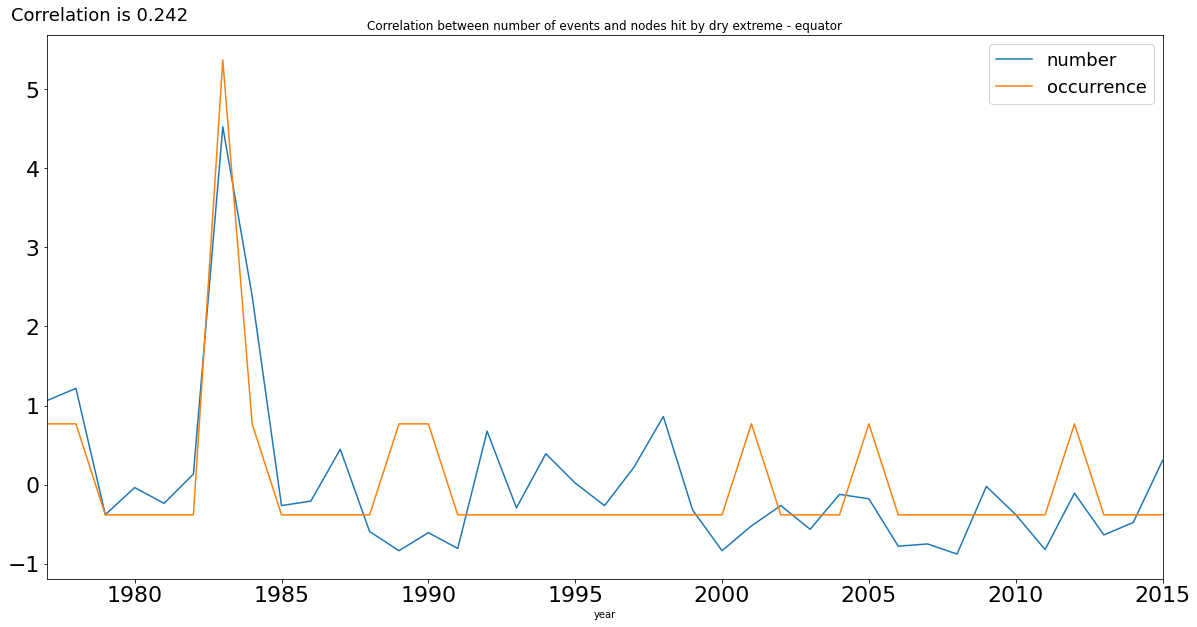

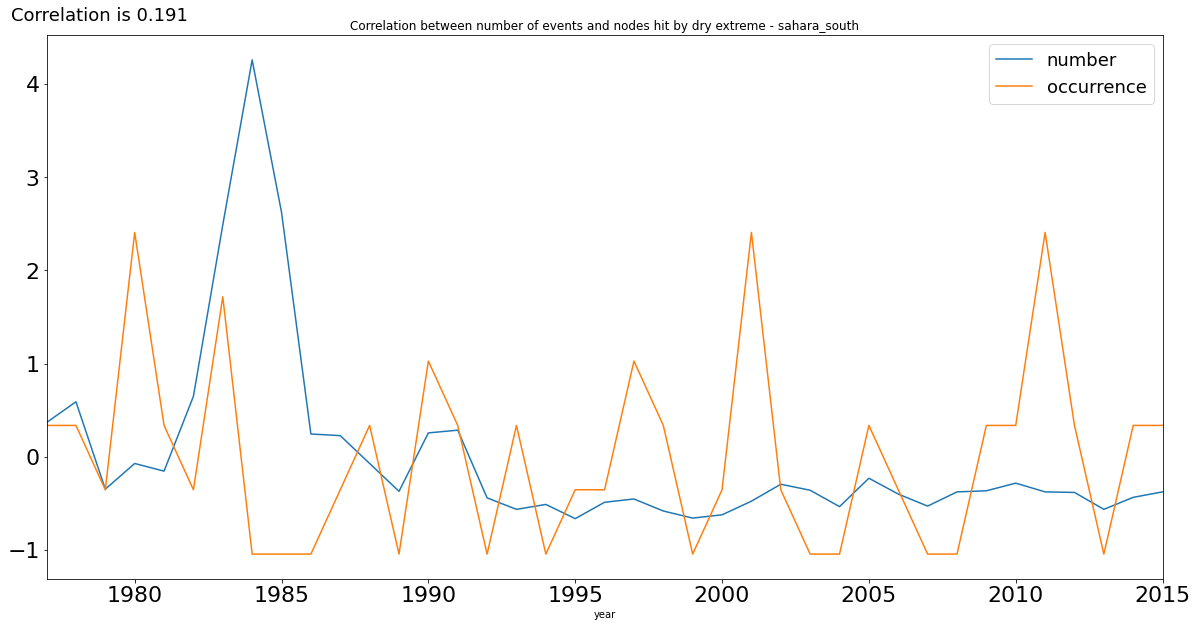

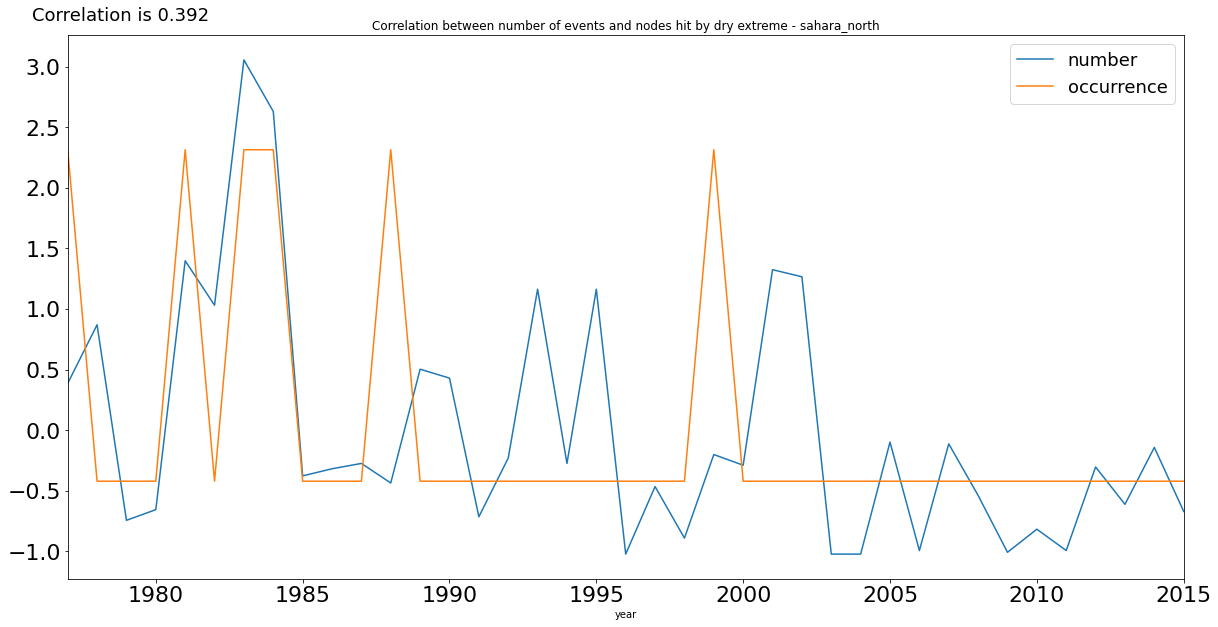

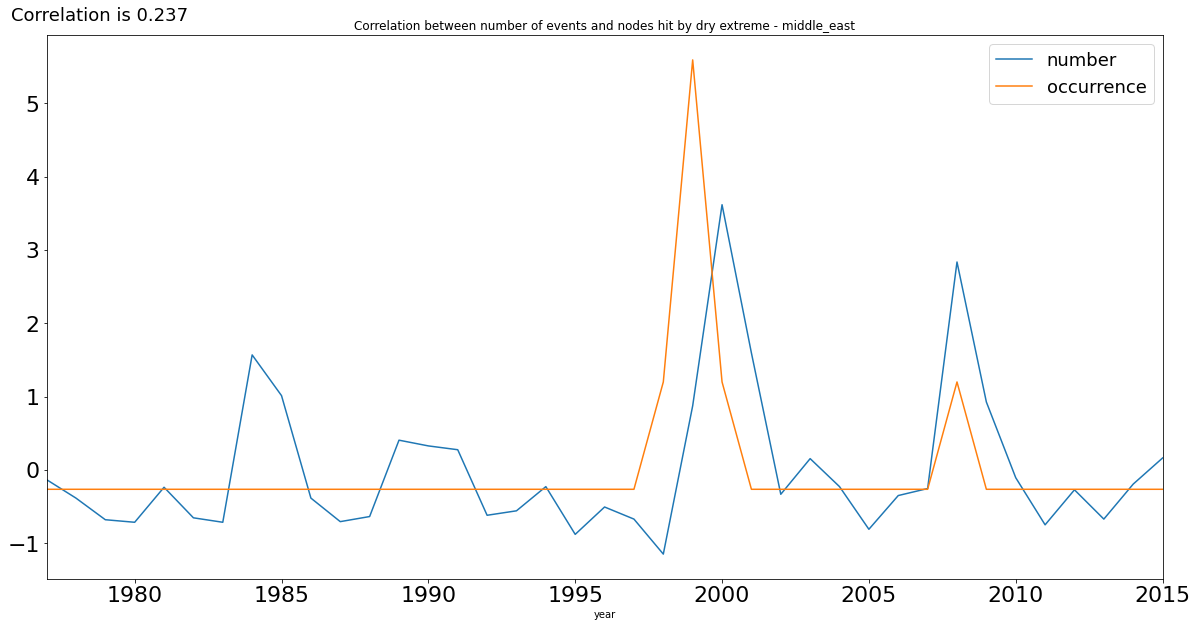

In [25]:
for region, countries in list(zip(regions,regions_countries)):
    d = IID_plot_occurrences(countries,region)
    

/home/mathsys2/Files/Time_Series/Climate_Network/Causality/TimeSeries/notebooks/Extreme_functions.py:322: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  RFThree = r.rolling(rolling_n).apply(sum)


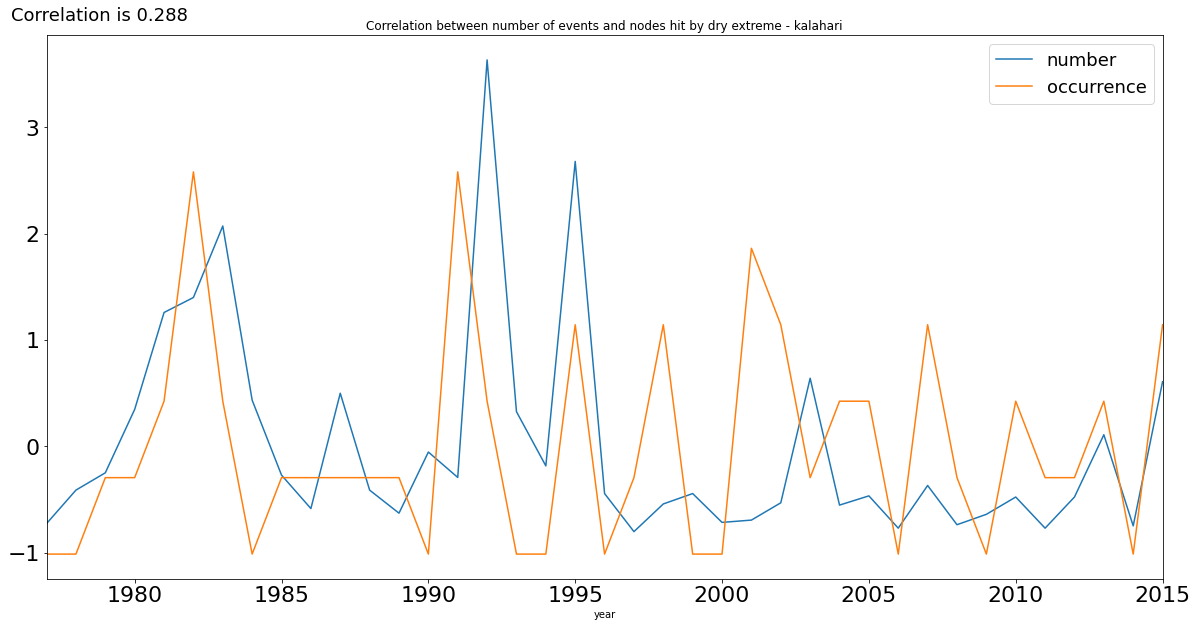

In [20]:
d = IID_plot_occurrences(kalahari,"kalahari")

# Correlation between extremes and Affected

In [71]:
countries_1 = ['NA', 'BW','ZA','ZM','ZW','AO','MZ','LS']
countries_3 = ['ET','SO','KE','TZ','MG','UG','DJ']
countries_5 = ['CD','CG','CM','GA','CF','TG','GH', 'CI']
countries_2 = ['SD','TD','NE','NG','ML','MR','SN','GN','BJ','BF','SL','LR']
countries_4 = ['DZ','MA','TN']
countries_0 = ['LY','EG','IL','IQ','IR','JO','LB','SY','SA','AE','YE','OM','QA','KW']

In [72]:
rolling_n = 12
extreme_type = 'dry'
indicator='SP.POP.TOTL'
cluster = 0

In [81]:
def IID_plot(cluster, countries_code, extreme_type = "dry"): 
    if extreme_type == "dry":
        file_name = "Data_{}.csv".format(cluster)
    else:
        file_name = "flood_{}.csv".format(cluster)
    et = pd.read_csv(file_name)
    et  = et.iloc[:,[0,4]]
    et  = et.dropna()
    et["year"] = pd.to_numeric(et["year"])
    
    df_oni = ef.extreme_plot(cluster,12, extreme_type = extreme_type)
    df_oni = df_oni.iloc[1:,:]

    N = df_oni.shape[0]
    df_oni = df_oni.rolling(12).sum()
    Idx = np.arange(11,N,12)
    df_oni = df_oni.iloc[Idx,:]

    year = np.arange(1977,2016)
    df_oni["year"] = year

    df = df_oni.merge(et, how = 'left')
    df = df.fillna(0)
    df = df.drop(["oni"], axis=1)


    dat = wb.download(indicator=indicator, country=countries_code, start=1940, end=2019)
    year = np.arange(2019,1959, -1)

    #df = pd.DataFrame({"year":year,"POP":dat["SP.POP.TOTL"].values})
    N = len(dat[indicator].keys())
    
    years = []
    countries = []
    for i in range(N):
        countries.append(dat[indicator].keys()[i][0])
        years.append(dat[indicator].keys()[i][1])

    years = list(set(years))
    countries = list(set(countries))

    result = []
    for year in years:
        temp = 0
        for country in countries:
            temp += dat[indicator][(country, year)]
        result.append(temp)

    years = [ int(x) for x in years ]
    df_pop =pd.DataFrame({'year':years, 'pop':result})
    df = df.merge(df_pop, how='left')

    df['Affected'] = df['Affected']/df['pop']
    df = df.fillna(0)

    df = df.drop(["pop"], axis=1)

    df = df.set_index("year")

    df_norm = (df - df.mean())/df.std()

    title = "Cluster {} Cumulative rainfall {} months {} extremes".format(cluster,rolling_n, extreme_type)
    plot = df_norm.plot(figsize=(20,10), title = title, fontsize = 18).legend(fontsize = 18)
    fig = plot.get_figure()
    filename = "../plots/IDD/flood/cluster_{}_{}.png".format(cluster, extreme_type)
    correlation = df_norm.corr(method = 'spearman')
    corr_text = "Correlation is {:.3f}".format(correlation.iloc[0,1])
    fig.text(0.1,0.9,corr_text,fontsize=18)
    fig.savefig(filename)
    return(df)

    #df_norm.plot()

    #df.corr()

/home/mathsys2/Files/Time_Series/Climate_Network/Causality/TimeSeries/notebooks/Extreme_functions.py:322: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  RFThree = r.rolling(rolling_n).apply(sum)


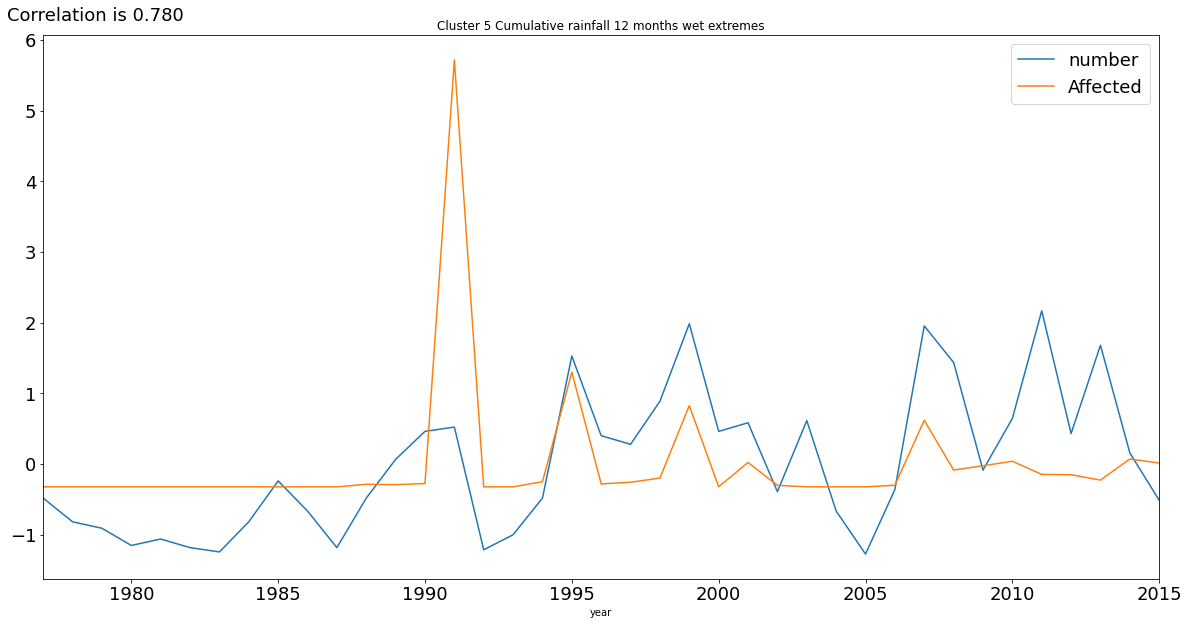

In [87]:
cluster = 5

df = IID_plot(cluster, countries_5, extreme_type = "wet")

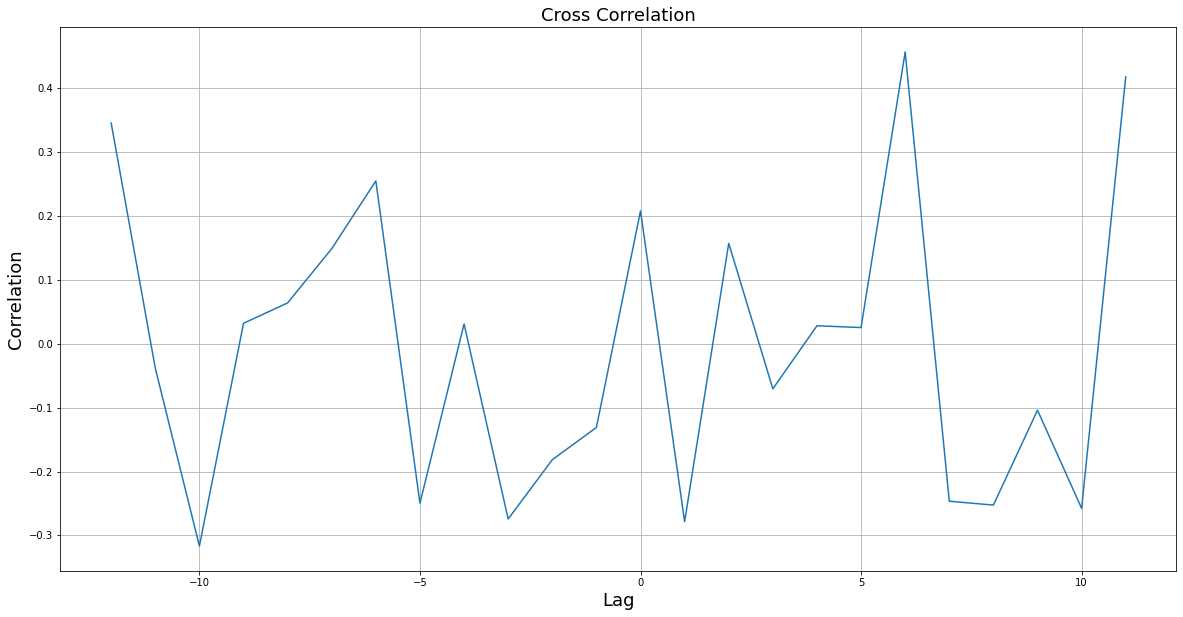

In [104]:
xcov_monthly = [ef.crosscorr(df["number"],df["Affected"],lag=i) for i in range(-12,12)]
lag = np.arange(-12,12)

fig = plt.figure()
plt.plot(lag, xcov_monthly)
plt.title("Cross Correlation", fontsize = 18)
plt.ylabel("Correlation", fontsize = 18)
plt.xlabel("Lag", fontsize = 18)
plt.grid()
#filename = "../plots/IDD/Corr_{}.png".format(cluster)
#fig.savefig(filename)

In [105]:
for i in range(-12,12):
    print("lag={}  cross-correlation:{}".format(i,xcov_monthly[i+12]))
    print(" ")

lag=-12  cross-correlation:0.3453982275482549
 
lag=-11  cross-correlation:-0.03819698615483907
 
lag=-10  cross-correlation:-0.3166266129000916
 
lag=-9  cross-correlation:0.03197053290917562
 
lag=-8  cross-correlation:0.06393009467831957
 
lag=-7  cross-correlation:0.1487544264230701
 
lag=-6  cross-correlation:0.2547977200286532
 
lag=-5  cross-correlation:-0.24943614795556454
 
lag=-4  cross-correlation:0.030908522092382002
 
lag=-3  cross-correlation:-0.27416212969117704
 
lag=-2  cross-correlation:-0.18151357991700862
 
lag=-1  cross-correlation:-0.13101120340487868
 
lag=0  cross-correlation:0.20787392682040626
 
lag=1  cross-correlation:-0.2784543715402527
 
lag=2  cross-correlation:0.15715597907966863
 
lag=3  cross-correlation:-0.07048312684225269
 
lag=4  cross-correlation:0.0281389888839524
 
lag=5  cross-correlation:0.025372337766351578
 
lag=6  cross-correlation:0.4567144334783849
 
lag=7  cross-correlation:-0.24641705992444682
 
lag=8  cross-correlation:-0.2524557380837

In [96]:
def IID_plot_without_zeros(cluster, countries_code, extreme_type = "dry"): 
    if extreme_type == "dry":
        file_name = "Data_{}.csv".format(cluster)
    else:
        file_name = "flood_{}.csv".format(cluster)
    et = pd.read_csv(file_name)
    et  = et.iloc[:,[0,4]]
    et  = et.dropna()
    et["year"] = pd.to_numeric(et["year"])
    
    df_oni = ef.extreme_plot(cluster,12, extreme_type = extreme_type)
    df_oni = df_oni.iloc[1:,:]
    
    N = df_oni.shape[0]
    df_oni = df_oni.rolling(12).sum()
    Idx = np.arange(11,N,12)
    df_oni = df_oni.iloc[Idx,:]

    year = np.arange(1977,2016)
    df_oni["year"] = year
    
    
    df = df_oni.merge(et)
    df = df.fillna(0)
    df = df.drop(["oni"], axis=1)

    year = df.year

    df = df.drop(["year"],axis = 1)

    df_norm  = (df-df.mean())/df.std()
    
    fig = plt.figure()
    title = "Cluster {} Cumulative rainfall {} months {} extremes".format(cluster,rolling_n, extreme_type)
    plt.plot(range(len(df_norm.number)),df_norm.number, label = "Number of Nodes")
    plt.plot(range(len(df_norm.number)),df_norm.Affected,label = "Number of Affected") 
    plt.title(title)
    filename = "../plots/IDD/withoutzero/flood/cluster_{}_{}.png".format(cluster, extreme_type)
    plt.legend()
    correlation = df_norm.corr(method = 'spearman')
    corr_text = "Correlation is {:.3f}".format(correlation.iloc[0,1])
    fig.text(0.1,0.9,corr_text,fontsize=18)
    fig.savefig(filename)
    return(df)

/home/mathsys2/Files/Time_Series/Climate_Network/Causality/TimeSeries/notebooks/Extreme_functions.py:322: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  RFThree = r.rolling(rolling_n).apply(sum)


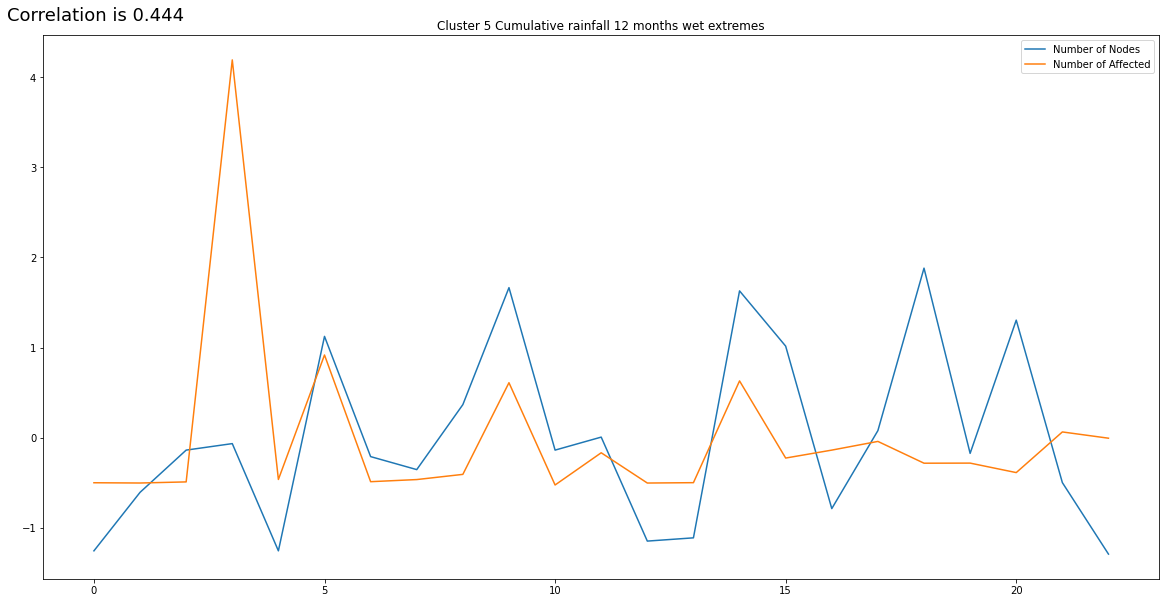

In [102]:
cluster = 5

df = IID_plot_without_zeros(cluster, countries_5, extreme_type = "wet")

In [ ]:
xcov_monthly = [ef.crosscorr(df["number"],df["Affected"],lag=i) for i in range(-12,12)]
lag = np.arange(-12,12)

fig = plt.figure()
plt.plot(lag, xcov_monthly)
plt.title("Cross Correlation", fontsize = 18)
plt.ylabel("Correlation", fontsize = 18)
plt.xlabel("Lag", fontsize = 18)
plt.grid()
#filename = "../plots/IDD/Corr_{}.png".format(cluster)
#fig.savefig(filename)

In [ ]:
for i in range(-12,12):
    print("lag={}  cross-correlation:{}".format(i,xcov_monthly[i+12]))
    print(" ")

In [4]:
def extreme_temperature_plot(cluster_id, rolling_n =12, extreme_type = "dry", n_components = 6):
    f = 12
    n = 30

    d = Data('../nc/air.mon.mean.nc.nc','air',temporal_limits,spatial_limits,missing_value=-9.969209968386869e+36)

    result = d.get_data()
    lon_list = d.get_lon_list()
    lat_list = d.get_lat_list()
    lon = d.get_lon()
    lat = d.get_lat()

    result = pd.DataFrame(result)
    result = pf.deseasonalize(np.array(result))
    #result = np.array(result)

    temp = np.array(result)
    clustering = AgglomerativeClustering(n_clusters=n_components).fit(np.transpose(temp))

    df = pd.DataFrame({"lons":lon_list,"lats":lat_list,"clusters":clustering.labels_})

    lon_temp = df["lons"].values
    lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
    df["lons"] = lon_temp

    clusters = clustering.labels_

    Idx = np.where((df.clusters == cluster_id).values)[0]

    d = Data('../precipitation.nc','precip',temporal_limits,missing_value=-9.969209968386869e+36)

    result = d.get_data()

    r = result[:,Idx]
    r = pd.DataFrame(r)


    RFThree = r.rolling(rolling_n).apply(sum)
    RFThree = RFThree.iloc[rolling_n - 1:,:]

    N = RFThree.shape[0]

    d3 = N - (n*f + 1)

    result_index = []
    for k in range(d3):
        onset = k
        end = k + (n*f - (rolling_n - 1))
        
        if extreme_type == "wet":
            a = RFThree.iloc[onset:end,:].quantile(0.95).values
            b = RFThree.iloc[end + (rolling_n - 1),:].values
            index = np.where(np.greater(b,a))[0]
            
        else:
            a = RFThree.iloc[onset:end,:].quantile(0.05).values
            b = RFThree.iloc[end + (rolling_n - 1),:].values
            index = np.where(np.greater(a,b))[0]

        result_index.append(index)

    number_cases = []
    for i in range(len(result_index)):
        number_cases.append(len(result_index[i]))
        
    
    if rolling_n == 12:
        start_date = "19761201"
    else:
        start_date = "19760{}01".format(rolling_n)
    df_oni = pd.DataFrame(number_cases,
                      columns=["number"],
                      index=pd.date_range(start_date, periods=len(number_cases), freq='MS'))

    oni = pd.read_csv("ONI.csv")
    
    if rolling_n == 12:
        oni_new = oni.iloc[323:792,:]
    elif rolling_n == 6:
        oni_new = oni.iloc[317:792,:]
    else:
        oni_new = oni.iloc[314:792,:]

    df_oni["oni"] = oni_new.iloc[:,5].values

    normalized_df=(df_oni-df_oni.mean())/df_oni.std()
    
    #title = "Cluster {} Cumulative rainfall {} months {} extremes".format(cluster_id,rolling_n, extreme_type)
    #plot = normalized_df.plot(figsize=(20,10), title = title)
    #fig = plot.get_figure()
    #filename = "../plots/extreme_plot_{}_months_cluster_{}_{}.png".format(rolling_n,cluster_id, extreme_type)
    #correlation = normalized_df.corr()
    #corr_text = "Correlation is {:.3f}".format(correlation.iloc[0,1])
    #fig.text(0.1,0.9,corr_text,fontsize=18)
    #fig.savefig(filename)
    return(df_oni)

In [61]:
cluster = 1

/home/mathsys2/Files/Time_Series/Climate_Network/Causality/TimeSeries/notebooks/Extreme_functions.py:322: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  RFThree = r.rolling(rolling_n).apply(sum)


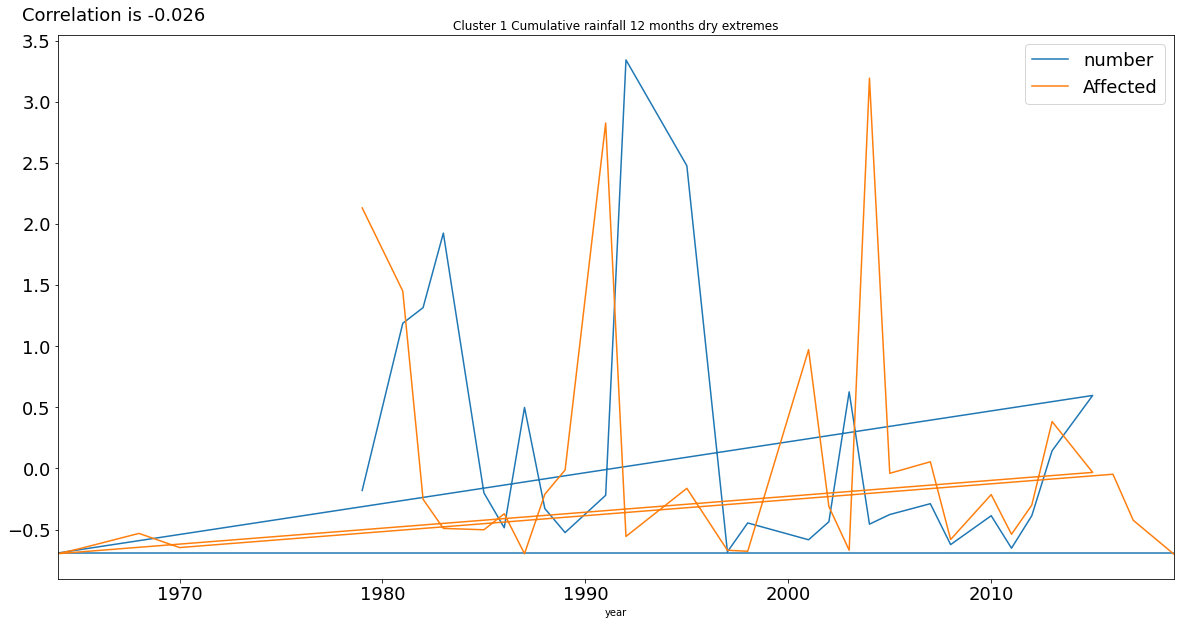

In [62]:
df = IID_plot(cluster, countries_1, extreme_type = "dry")

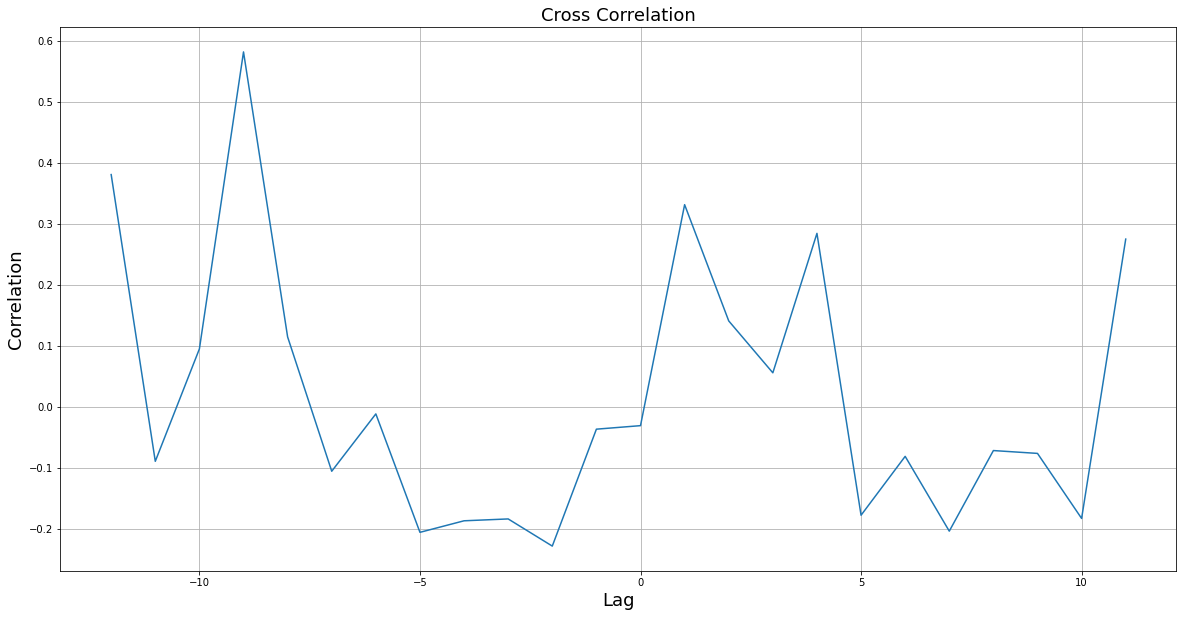

In [54]:
xcov_monthly = [ef.crosscorr(df["number"],df["Affected"],lag=i) for i in range(-12,12)]
lag = np.arange(-12,12)

fig = plt.figure()
plt.plot(lag, xcov_monthly)
plt.title("Cross Correlation", fontsize = 18)
plt.ylabel("Correlation", fontsize = 18)
plt.xlabel("Lag", fontsize = 18)
plt.grid()
filename = "../plots/IDD/Corr_{}.png".format(cluster)
fig.savefig(filename)

In [205]:
for i in range(-12,12):
    print("lag={}  cross-correlation:{}".format(i,xcov_monthly[i+12]))
    print(" ")

lag=-12  cross-correlation:-0.27505681824201206
 
lag=-11  cross-correlation:-0.2674203011418321
 
lag=-10  cross-correlation:-0.19902499520640055
 
lag=-9  cross-correlation:-0.0984843137897968
 
lag=-8  cross-correlation:0.09350889745169158
 
lag=-7  cross-correlation:0.41506428286466457
 
lag=-6  cross-correlation:0.28228047845292253
 
lag=-5  cross-correlation:0.10837492964606826
 
lag=-4  cross-correlation:-0.012615761771256713
 
lag=-3  cross-correlation:0.06289351216086433
 
lag=-2  cross-correlation:-0.04062631207786602
 
lag=-1  cross-correlation:-0.03799393687245478
 
lag=0  cross-correlation:0.2639265115576941
 
lag=1  cross-correlation:0.478320503642784
 
lag=2  cross-correlation:0.3096921054852126
 
lag=3  cross-correlation:0.20294940544356502
 
lag=4  cross-correlation:0.29841214324933313
 
lag=5  cross-correlation:0.15971648079769812
 
lag=6  cross-correlation:0.010685488759828273
 
lag=7  cross-correlation:0.21646672004608142
 
lag=8  cross-correlation:0.300535970951405

In [13]:
countries_1 = ['NA', 'BW','ZA','ZM','ZW','AO','MZ','LS']
countries_3 = ['ET','SO','KE','TZ','MG','UG','DJ']
countries_5 = ['CD','CG','CM','GA','CF','TG','GH', 'CI']
countries_2 = ['SD','TD','NE','NG','ML','MR','SN','GN','BJ','BF','SL','LR']
countries_4 = ['DZ','MA','TN']
countries_0 = ['LY','EG','IL','IQ','IR','JO','LB','SY','SA','AE','YE','OM','QA','KW']

#countries = ['ET']

#countries.append(countries_5)



rolling_n = 12
extreme_type = 'dry'
indicator='SP.POP.TOTL'
cluster = 0

In [19]:
def IID_plot_with_temp(cluster, countries_code, extreme_type = "dry"): 
    if extreme_type == "dry":
        file_name = "Data_{}.csv".format(cluster)
    else:
        file_name = "flood_{}.csv".format(cluster)
    et = pd.read_csv(file_name)
    et  = et.iloc[:,[0,4]]
    et  = et.dropna()
    et["year"] = pd.to_numeric(et["year"])
    
    df_oni = extreme_plot_rainfall_temperature(cluster,12, extreme_type = extreme_type)
    df_oni = df_oni.iloc[1:,:]

    N = df_oni.shape[0]
    df_oni = df_oni.rolling(12).sum()
    Idx = np.arange(11,N,12)
    df_oni = df_oni.iloc[Idx,:]

    year = np.arange(1979,2016)
    df_oni["year"] = year

    df = df_oni.merge(et)
    df = df.fillna(0)
    
    df = df.fillna(0)

    df = df.set_index("year")

    df_norm = (df - df.mean())/df.std()

    title = "Cluster {} Cumulative rainfall {} months {} extremes".format(cluster,rolling_n, extreme_type)
    plot = df_norm.plot(figsize=(20,10), title = title, fontsize = 18).legend(fontsize = 18)
    fig = plot.get_figure()
    filename = "../plots/IDD/temperature/cluster_{}_{}_with_temp.png".format(cluster, extreme_type)
    correlation = df_norm.corr()
    #corr_text = "Correlation is {:.3f}".format(correlation.iloc[0,1])
    fig.text(0.1,0.9,corr_text,fontsize=18)
    fig.savefig(filename)
    return(df)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


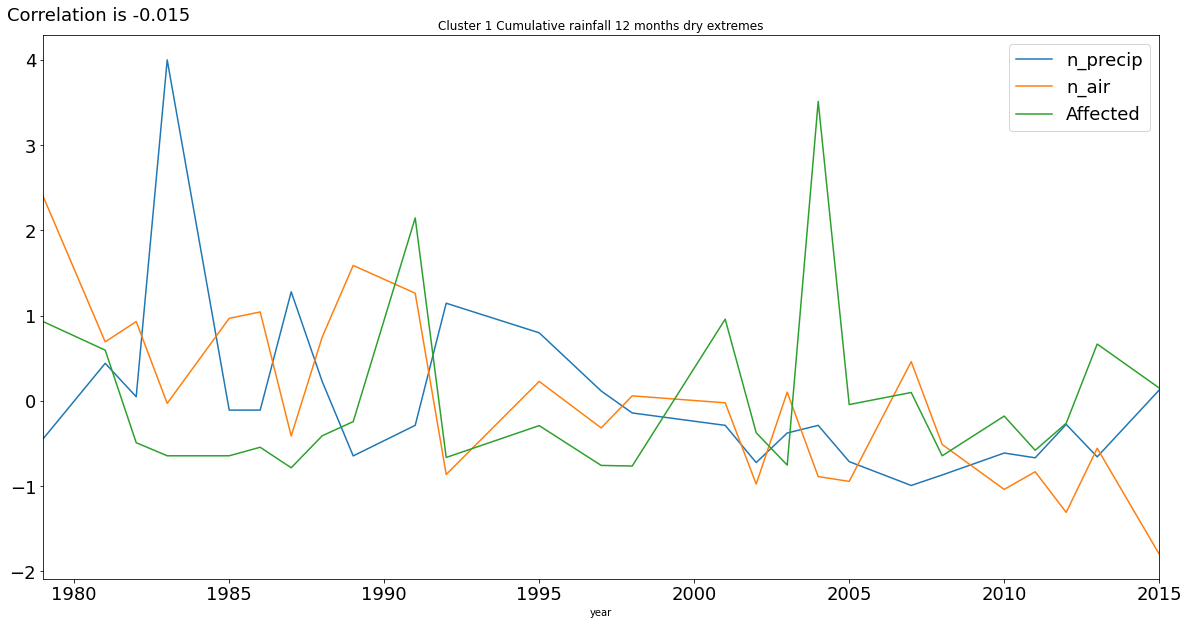

In [21]:
df = IID_plot_with_temp(, countries_1)

In [22]:
df_norm = (df - df.mean())/df.std()

In [23]:
df_norm.corr()

n_precip     n_air  Affected
n_precip  1.000000 -0.014579 -0.209435
n_air    -0.014579  1.000000  0.079337
Affected -0.209435  0.079337  1.000000

In [49]:
file_name = "Data_{}.csv".format(cluster)
et = pd.read_csv(file_name)
et  = et.iloc[:,[0,4]]
et  = et.dropna()
et["year"] = pd.to_numeric(et["year"])
df_oni = ef.extreme_plot(cluster,12)

df_oni = df_oni.iloc[1:,:]

N = df_oni.shape[0]

df_oni = df_oni.rolling(12).sum()

Idx = np.arange(11,N,12)

df_oni = df_oni.iloc[Idx,:]

year = np.arange(1977,2016)

df_oni["year"] = year

df = df_oni.merge(et, how = 'left')

df = df.fillna(0)

df = df.drop(["oni"], axis=1)

/home/mathsys2/Files/Time_Series/Climate_Network/Causality/TimeSeries/notebooks/Extreme_functions.py:322: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  RFThree = r.rolling(rolling_n).apply(sum)


Text(0.1, 0.9, 'Correlation is -0.068')

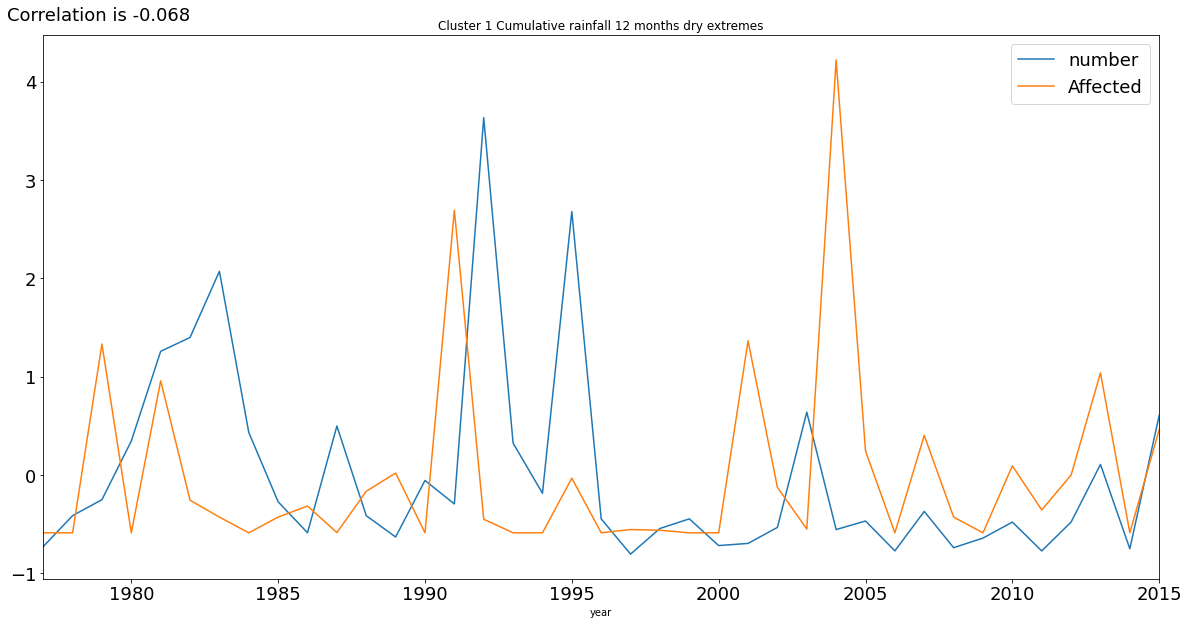

In [51]:
df = df.set_index("year")

df_norm = (df - df.mean())/df.std()

title = "Cluster {} Cumulative rainfall {} months {} extremes".format(cluster,rolling_n, extreme_type)
plot = df_norm.plot(figsize=(20,10), title = title, fontsize = 18).legend(fontsize = 18)
fig = plot.get_figure()
filename = "../plots/IDD/cluster_{}_{}.png".format(cluster, extreme_type)
correlation = df_norm.corr()
corr_text = "Correlation is {:.3f}".format(correlation.iloc[0,1])
fig.text(0.1,0.9,corr_text,fontsize=18)

In [29]:
dat = wb.download(indicator=indicator, country=['ET','SO','KE','TZ','MG','UG','DJ'], start=1940, end=2019)

year = np.arange(2019,1959, -1)

#df = pd.DataFrame({"year":year,"POP":dat["SP.POP.TOTL"].values})

N = len(dat[indicator].keys())



years = []
countries = []
for i in range(N):
    countries.append(dat[indicator].keys()[i][0])
    years.append(dat[indicator].keys()[i][1])

years = list(set(years))
countries = list(set(countries))

result = []
for year in years:
    temp = 0
    for country in countries:
        temp += dat[indicator][(country, year)]
    result.append(temp)

years = [ int(x) for x in years ]

df_pop =pd.DataFrame({'year':years, 'pop':result})

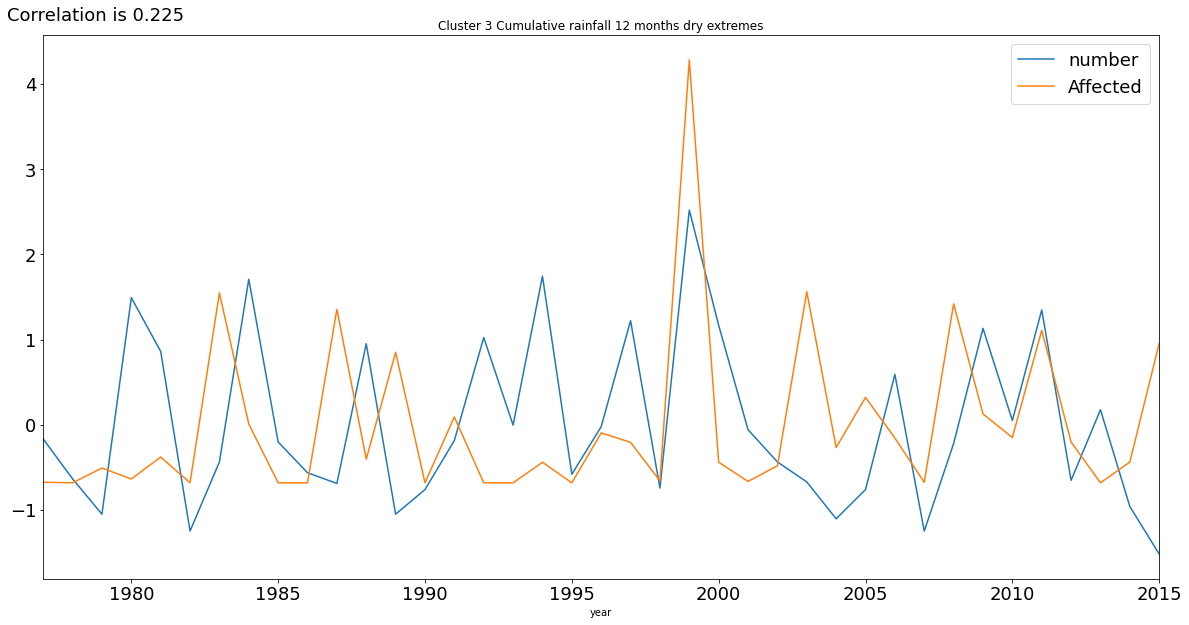

In [30]:
df = df.merge(df_pop, how='left')

df['Affected'] = df['Affected']/df['pop']

df = df.drop(["pop"], axis=1)

df = df.set_index("year")

df_norm = (df - df.mean())/df.std()

title = "Cluster {} Cumulative rainfall {} months {} extremes".format(cluster,rolling_n, extreme_type)
plot = df_norm.plot(figsize=(20,10), title = title, fontsize = 18).legend(fontsize = 18)
fig = plot.get_figure()
filename = "../plots/IDD/cluster_{}_{}.png".format(cluster, extreme_type)
correlation = df_norm.corr()
corr_text = "Correlation is {:.3f}".format(correlation.iloc[0,1])
fig.text(0.1,0.9,corr_text,fontsize=18)
fig.savefig(filename)

#df_norm.plot()

#df.corr()